In [1]:
#iport necessarsy libaries
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
#Importing the CSV FILE
df_tele= pd.read_csv('TelcoCustomerChurn.csv')
df_tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#Replace empty values in totalcharge swith NAN
df_tele['TotalCharges'] = df_tele['TotalCharges'].replace(" ",np.nan)

In [4]:
print ("\nMissing values :  ", df_tele.isnull().sum().values.sum())


Missing values :   11


In [5]:
#convert to float type
df_tele["TotalCharges"] = df_tele["TotalCharges"].astype(float)

In [6]:
#Drop customer ID as it wont affect the churning rate at all
df_tele.drop(['customerID'], axis=1, inplace=True)

In [7]:
#Changing the values from out target (churn to numeric 1s and 0s)
df_tele['Churn'] = df_tele['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [8]:
#Seperate column for male and female 
#df_tele = pd.get_dummies(data=df_tele, columns=['gender'])

In [9]:
#Changing values of Partner to numeric for better processing (0s and 1s)
df_tele['Partner'] = df_tele['Partner'].map(lambda s :1 if s =='Yes' else 0)

In [10]:
#Changing values of Gender to numeric for better processing (0s and 1s)
df_tele['gender'] = df_tele['gender'].map(lambda s :1 if s =='Male' else 0)

In [11]:
#Similarily repeat for other features where it is possible to classify into binary values 
#Dependents, PhoneServices, PaperlessBilling 
df_tele['Dependents'] = df_tele['Dependents'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PhoneService'] = df_tele['PhoneService'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PaperlessBilling'] = df_tele['PaperlessBilling'].map(lambda s :1 if s =='Yes' else 0)

In [12]:
#For MutipleLines we can see 3 categorial values yes no and NO phone Service 
#After analysing we can consider NoPhoneService as also NO 
#Therefore we can convert this into numNo phone service
df_tele['MultipleLines'].replace('No phone service','No', inplace=True)
df_tele['MultipleLines'] = df_tele['MultipleLines'].map(lambda s :1 if s =='Yes' else 0)

In [13]:
#Similar procedure for OnlineSecurity
df_tele['OnlineSecurity'].replace('No phone service','No', inplace=True)
df_tele['OnlineSecurity'] = df_tele['OnlineSecurity'].map(lambda s :1 if s =='Yes' else 0)
#OnlineBackup
df_tele['OnlineBackup'].replace('No phone service','No', inplace=True)
df_tele['OnlineBackup'] = df_tele['OnlineBackup'].map(lambda s :1 if s =='Yes' else 0)
#StreamingTV
df_tele['StreamingTV'].replace('No phone service','No', inplace=True)
df_tele['StreamingTV'] = df_tele['StreamingTV'].map(lambda s :1 if s =='Yes' else 0)
#StreamingMovies
df_tele['StreamingMovies'].replace('No phone service','No', inplace=True)
df_tele['StreamingMovies'] = df_tele['StreamingMovies'].map(lambda s :1 if s =='Yes' else 0)
#DeviceProtection
df_tele['DeviceProtection'].replace('No phone service','No', inplace=True)
df_tele['DeviceProtection'] = df_tele['DeviceProtection'].map(lambda s :1 if s =='Yes' else 0)
#TechSupport
df_tele['TechSupport'].replace('No phone service','No', inplace=True)
df_tele['TechSupport'] = df_tele['TechSupport'].map(lambda s :1 if s =='Yes' else 0)

In [14]:
#Tenure - Converting values to categorical valeus 
def tenure_cateorize(df_tele) :
    if df_tele["tenure"] <= 12 :
        return "0-12 Mts."
    elif (df_tele["tenure"] > 12) & (df_tele["tenure"] <= 24 ):
        return "12-24 Mts."
    elif (df_tele["tenure"] > 24) & (df_tele["tenure"] <= 48) :
        return "24-48 Mts."
    elif (df_tele["tenure"] > 48) & (df_tele["tenure"] <= 60) :
        return "48-60 Mts."
    elif df_tele["tenure"] > 60 :
        return "grt_60 Mts."
df_tele["Tenure_Group"] = df_tele.apply(lambda df_tele:tenure_cateorize(df_tele),axis = 1)

In [15]:
#Seperate feature Tenure_Group with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Tenure_Group'])

In [16]:
#Making a seperate column for DSL and Fiber optic with converted values 1s and 0s
df_tele['Fiber_optic'] = df_tele['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df_tele['DSL'] = df_tele['InternetService'].map(lambda s :1  if s =='DSL' else 0)
df_tele['Has_InternetService'] = df_tele['InternetService'].map(lambda s :0  if s =='No' else 1)

In [17]:
#Since we have seperted the Internetservice column for each Value we do not need the internet service column anymore 
del df_tele['InternetService']

In [18]:
#Seperate feature Paymentvalues with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['PaymentMethod'])

In [19]:
#Seperate feature Contracts with binary values 
df_tele = pd.get_dummies(data=df_tele, columns=['Contract'])

In [26]:
#to rearrange columns
columns = ['Churn','TotalCharges','MonthlyCharges','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','Has_InternetService','DSL','Fiber_optic','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Tenure_Group_0-12 Mts.','Tenure_Group_12-24 Mts.','Tenure_Group_24-48 Mts.','Tenure_Group_48-60 Mts.','Tenure_Group_grt_60 Mts.','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check','Contract_Month-to-month','Contract_One year','Contract_Two year']

In [27]:
pd.set_option('display.max_columns', None)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,Fiber_optic,DSL,Has_InternetService,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0
5,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0
6,1,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0
8,0,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
9,1,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0


In [28]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
gender                                     7043 non-null int64
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
MultipleLines                              7043 non-null int64
OnlineSecurity                             7043 non-null int64
OnlineBackup                               7043 non-null int64
DeviceProtection                           7043 non-null int64
TechSupport                                7043 non-null int64
StreamingTV                                7043 non-null int64
StreamingMovies                            7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyChar

In [29]:
df_tele_final = df_tele.reindex(columns=columns)
df_tele_final

,Churn,TotalCharges,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Has_InternetService,DSL,Fiber_optic,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure_Group_0-12 Mts.,Tenure_Group_12-24 Mts.,Tenure_Group_24-48 Mts.,Tenure_Group_48-60 Mts.,Tenure_Group_grt_60 Mts.,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,29.85,29.85,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,0,1889.50,56.95,1,0,0,0,34,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,1,108.15,53.85,1,0,0,0,2,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
3,0,1840.75,42.30,1,0,0,0,45,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,151.65,70.70,0,0,0,0,2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
5,1,820.50,99.65,0,0,0,0,8,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0
6,0,1949.40,89.10,1,0,0,1,22,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
7,0,301.90,29.75,0,0,0,0,10,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8,1,3046.05,104.80,0,0,1,0,28,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0
9,0,3487.95,56.15,1,0,0,1,62,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [31]:
df_tele_final.to_csv('Cleaned_DataFrame1.csv', index=False)

In [ ]:
df_tele_final.info()

In [ ]:
df_tele.keys()

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%')]

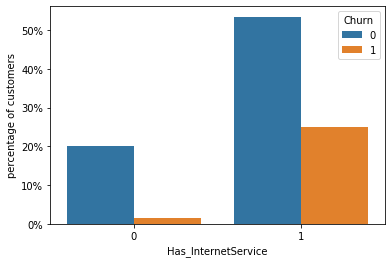

In [15]:
#Plot MutipleLines attribute
Has_Internet_Churn = df_tele.groupby("Has_InternetService")["Churn"].value_counts().to_frame()
Has_Internet_Churn = Has_Internet_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Has_Internet_Churn["percentage of customers"] = Has_Internet_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Has_InternetService", y="percentage of customers", hue='Churn', data=Has_Internet_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


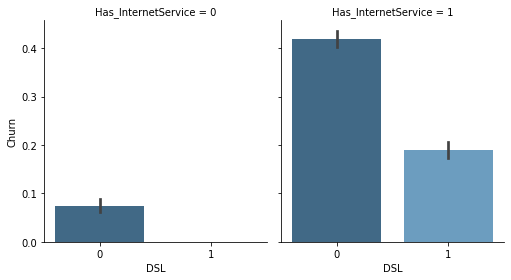

In [17]:
#For internet Servie who have a DSL connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "DSL", "Churn", palette = "Blues_d", order= [0, 1])

In [18]:
lab = df_tele["Churn"].value_counts().keys().tolist()
lab

[0, 1]

In [19]:
val = df_tele["Churn"].value_counts().values.tolist()
val

[5174, 1869]

In [20]:
#Gives some key deatils about our DataFrame
#df_tele.describe()

In [21]:
#to check for any null or NaN values in the DF 
#df_tele.isnull().sum()

In [22]:
#2_d Scatter plot wiht color-coding for each feature type 
#sns.set_style("whitegrid");
#sns.FacetGrid(banktrans, hue="Churn", size=10) \
 #   .map(plt.scatter,"MonthlyCharges","PaymentMethod") \
 #  .add_legend()
#sns.pairplot(df_tele,hue="Churn",size=4);
#plt.show();

#From the plot below we can conclude that people who
#------------------------* Are relativly new
#- ----------------------* have higher monthly charges
#------------------------* and total charges <2000
# are more likely to churn--------------------

In [23]:
#Plot how Senior citize
SenCit_Churn = df_tele.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()
SenCit_Churn = SenCit_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
SenCit_Churn["percentage of customers"] = SenCit_Churn["percentage of customers"]/len(df_tele)

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%')]

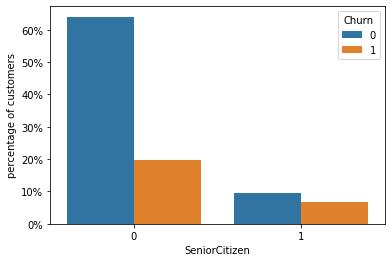

In [24]:
ax = sns.barplot(x="SeniorCitizen", y="percentage of customers", hue='Churn', data=SenCit_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

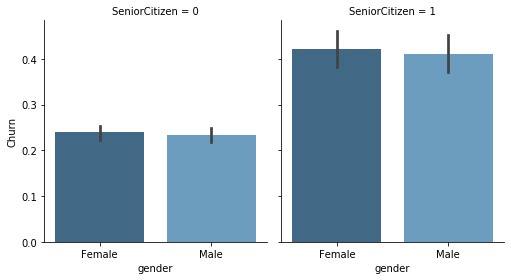

In [25]:
g = sns.FacetGrid(df_tele, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "Churn", palette = "Blues_d", order= ['Female', 'Male'])

[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%'),
 Text(0, 0, '45%')]

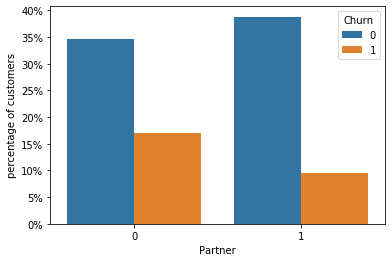

In [26]:
#Plot Partner attribute
Partner_Churn = df_tele.groupby("Partner")["Churn"].value_counts().to_frame()
Partner_Churn = Partner_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Partner_Churn["percentage of customers"] = Partner_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Partner", y="percentage of customers", hue='Churn', data=Partner_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%')]

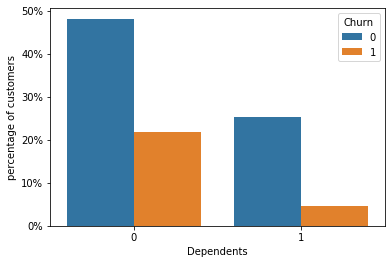

In [27]:
#Plot dependents attribute
Dependent_Churn = df_tele.groupby("Dependents")["Churn"].value_counts().to_frame()
Dependent_Churn = Dependent_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Dependent_Churn["percentage of customers"] = Dependent_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Dependents", y="percentage of customers", hue='Churn', data=Dependent_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%')]

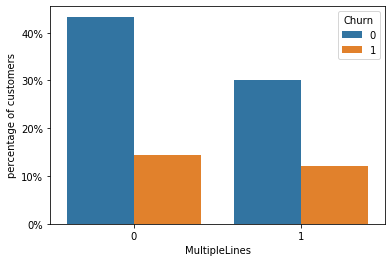

In [28]:
#Plot MutipleLines attribute
MutipleLines_Churn = df_tele.groupby("MultipleLines")["Churn"].value_counts().to_frame()
MutipleLines_Churn = MutipleLines_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
MutipleLines_Churn["percentage of customers"] = MutipleLines_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="MultipleLines", y="percentage of customers", hue='Churn', data=MutipleLines_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


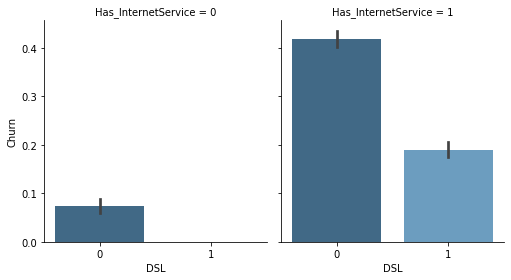

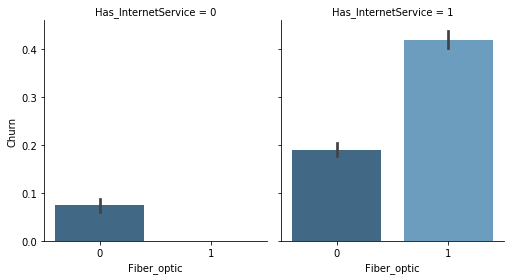

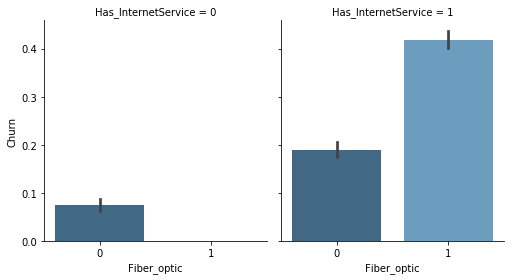

In [29]:
#For internet Servie who have a DSL connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "DSL", "Churn", palette = "Blues_d", order= [0, 1])
#For internet Servie who have a Fiber Optic connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "Fiber_optic", "Churn", palette = "Blues_d", order= [0, 1])
#For customer with no Internet Service 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "Fiber_optic", "Churn", palette = "Blues_d", order= [0, 1])


In [30]:
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_InternetService,tenure_group,Fiber_optic,DSL
0,Female,0,1,0,1,0,0,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,Tenure_0-12,0,1
1,Male,0,0,0,34,1,0,DSL,1,0,...,One year,0,Mailed check,56.95,1889.50,0,1,Tenure_24-48,0,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,Tenure_0-12,0,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Tenure_24-48,0,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,Tenure_0-12,1,0
5,Female,0,0,0,8,1,1,Fiber optic,0,0,...,Month-to-month,1,Electronic check,99.65,820.50,1,1,Tenure_0-12,1,0
6,Male,0,0,1,22,1,1,Fiber optic,0,1,...,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1,Tenure_12-24,1,0
7,Female,0,0,0,10,0,0,DSL,1,0,...,Month-to-month,0,Mailed check,29.75,301.90,0,1,Tenure_0-12,0,1
8,Female,0,1,0,28,1,1,Fiber optic,0,0,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1,Tenure_24-48,1,0
9,Male,0,0,1,62,1,0,DSL,1,1,...,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,Tenure_grt_60,0,1


[Text(0, 0, '0%'),
 Text(0, 0, '2%'),
 Text(0, 0, '5%'),
 Text(0, 0, '8%'),
 Text(0, 0, '10%'),
 Text(0, 0, '12%'),
 Text(0, 0, '15%'),
 Text(0, 0, '18%'),
 Text(0, 0, '20%')]

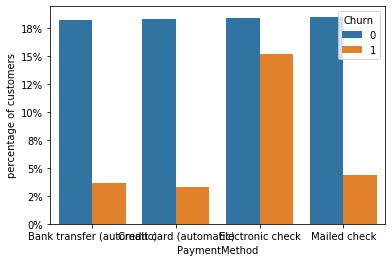

In [31]:
#Plot Internet attribute
Payment_Churn = df_tele.groupby("PaymentMethod")["Churn"].value_counts().to_frame()
Payment_Churn = Payment_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Payment_Churn["percentage of customers"] = Payment_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="PaymentMethod", y="percentage of customers", hue='Churn', data=Payment_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


C:\Users\clive\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


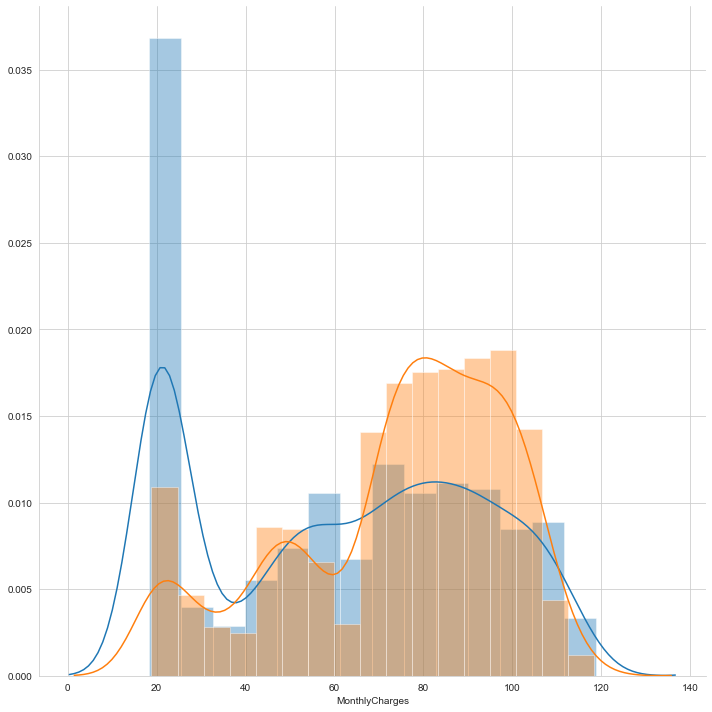

In [32]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"MonthlyCharges")
plt.show();

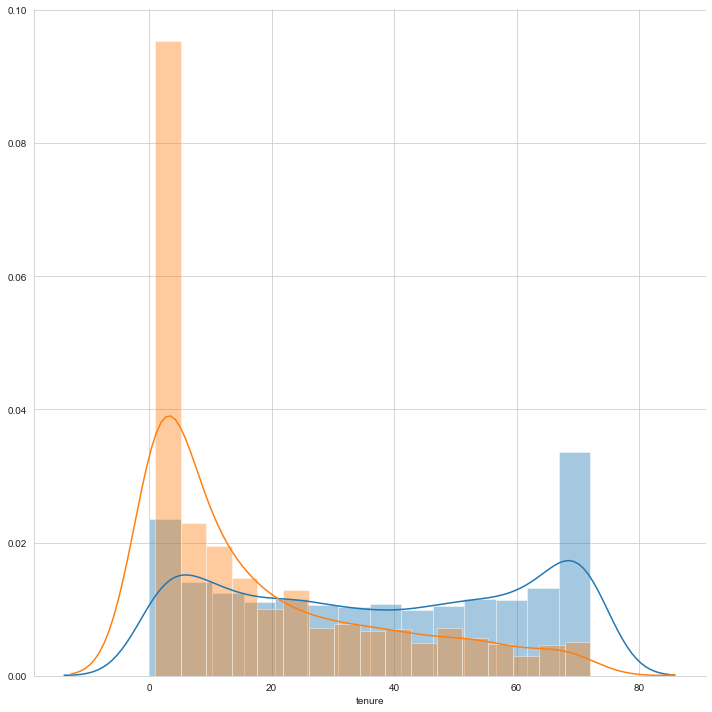

In [33]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"tenure")
plt.show();

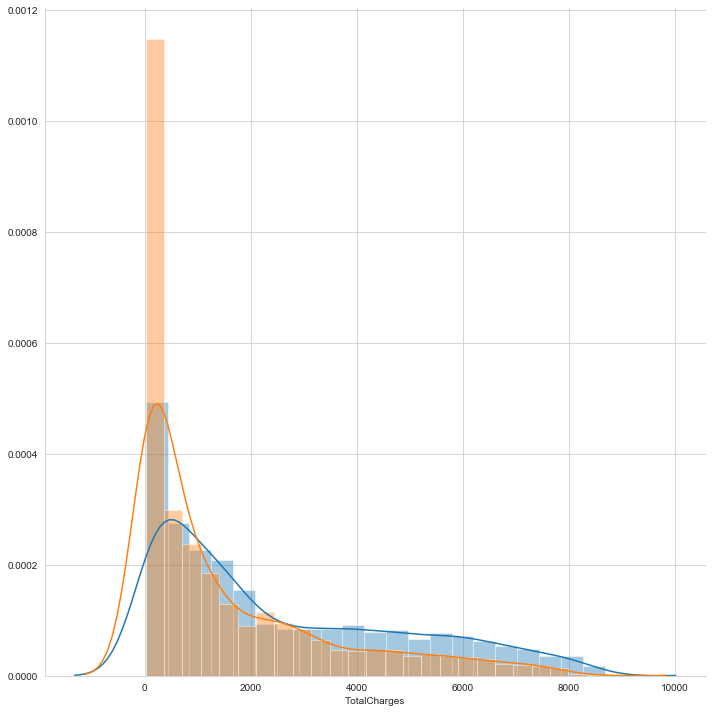

In [34]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"TotalCharges") 
plt.show();

In [35]:
d

NameError: name 'd' is not defined